    Nama  : Muhammad Iqbal Perdana
    NIM   : 09011281722057
    Kelas : SK5A
    MK    : Kecerdasan Buatan (A.I.)
    Dosen : Prof. Dr. Ir. Siti Nurmaini, M.T.

# Tugas A.I. (Aplikasi Logika Fuzzy Metode Mamdani dalam Pengambilan Keputusan Penentuan Jumlah Produksi)

Suatu perusahaan makanan akan memproduksi coklat jenis H. Data biaya produksi enam bulan terakhir coklat jenis H rata-rata sekitar Rp 750,00 per bungkus dan maksimum mencapai Rp 1.500,00 per bungkus, sedangkan data permintaan rata-rata mencapai 50.000 bungkus dan maksimum mencapai 100.000 bungkus. Sampai saat ini perusahaan tersebut baru mampu memproduksi coklat jenis H maksimal sebanyak 140.000 bungkus. Metode Mamdani digunakan untuk menentukan jumlah produksi coklat jenis H, dengan data biaya produksi dan permintaan produk masing-masing adalah Rp 800,00 per bungkus dan 45.000 kemasan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Dalam pembahasan ini, digunakan input yang berupa :

- Biaya Produksi memiliki 3 kondisi, yaitu :
    - Biaya Produksi Rendah (Berkisar antara 200 - 750 Rupiah)
    - Biaya Produksi Standar (berkisar antara 475 - 1025 Rupiah)
    - Biaya Produksi Tinggi (Berkisar antara 750 - 1300 Rupiah)


- Permintaan memiliki 3 kondisi, yaitu :
    - Permintaan Turun (Berkisar antara 10000 - 50000 bungkus)
    - Permintaan Biasa (Berkisar antara 30000 - 70000 bungkus)
    - Permintaan Naik (Berkisar antara 50000 - 90000 bungkus)

Output yang digunakan adalah sebagai berikut : 

- Produksi memiliki 3 kondisi, yaitu :
    - Produksi Berkurang (Berkisar antara 10000 - 70000 bungkus)
    - Produksi Normal (Berkisar antara 40000 - 100000 bungkus)
    - Produksi Bertambah (Berkisar antara 70000 - 130000 bungkus)

# Fuzzifikasi pada Biaya Produksi

Biaya Produksi memiliki fungsi keanggotaan dengan 3 Kondisi :
$$ Biaya \ Produksi $$
$$ Rendah = Rp \ 200 - Rp \ 750 $$
$$ Standar = Rp \ 475 - Rp \ 1025 $$
$$ Tinggi = Rp \ 750 - Rp \ 1300 $$

Dengan fungsi keanggotaan Biaya Produksi berikut ini :

\begin{equation}
  bprd['rendah'] = \mu BPRDRendah(x)=\begin{cases}
    1; & \text{$x\leq 200$}.\\
    \frac {750 - x}{750 - 200}; & \text{$200 \leq x \leq 750$}.\\
    0; & \text{$x\geq 750$}.
  \end{cases}
  \\
  bprd['standar'] = \mu BPRDStandar(x)=\begin{cases}
    0; & \text{$x\leq 475$ atau $x\geq 1025$}.\\
    \frac {x - 475}{750 - 475}; & \text{$475 \leq x \leq 750$}.\\
    \frac {1025 - x}{1025 - 750}; & \text{$750 \leq x \leq 1025$}.\\
  \end{cases}
  \\
  bprd['tinggi'] = \mu BPRDTinggi(x)=\begin{cases}
    0; & \text{$x\leq 750$}.\\
    \frac {x - 750}{1300 - 750}; & \text{$750 \leq x \leq 1300$}.\\
    1; & \text{$x \geq 1300$}.\\
  \end{cases}
\end{equation}

In [2]:
plt_bprd = np.arange(1,1526,25)
biayaproduksi = ctrl.Antecedent(np.arange(1,1526,25), 'Biaya Produksi')

In [3]:
biayaproduksi['Rendah'] = fuzz.trapmf(biayaproduksi.universe, [1, 1, 200, 750])
biayaproduksi['Standar'] = fuzz.trimf(biayaproduksi.universe, [475, 750, 1025])
biayaproduksi['Tinggi'] = fuzz.trapmf(biayaproduksi.universe, [750, 1300, 1525, 1525])

- Plotting fungsi keanggotaan $\mu BPRDRendah(x)$, $\mu BPRDStandar(x)$, dan $\mu BPRDTinggi(x)$

Text(0.5,1,'Biaya Produksi Tinggi')

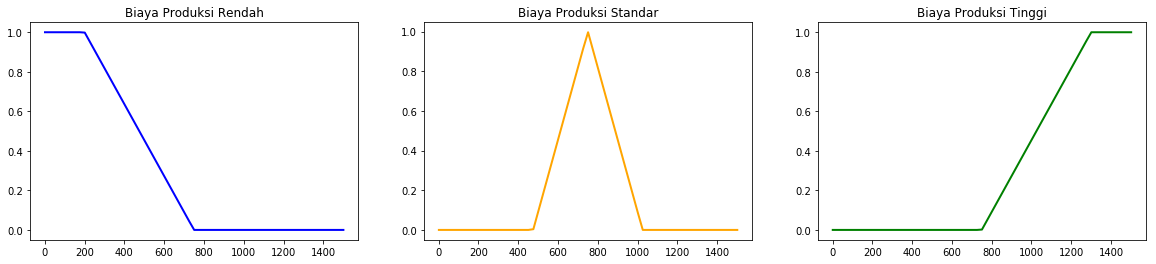

In [4]:
bprd_rendah = fuzz.trapmf(plt_bprd, [1, 1, 200, 750])
bprd_standar = fuzz.trimf(plt_bprd, [475, 750, 1025])
bprd_tinggi = fuzz.trapmf(plt_bprd, [750, 1300, 1525, 1525])
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(20,4))
ax0.plot(plt_bprd,bprd_rendah,'blue', linewidth=2, label='Biaya Produksi Rendah')
ax1.plot(plt_bprd,bprd_standar,'orange', linewidth=2, label='Biaya Produksi Standar')
ax2.plot(plt_bprd,bprd_tinggi,'green', linewidth=2, label='Biaya Produksi Tinggi')
ax0.set_title('Biaya Produksi Rendah')
ax1.set_title('Biaya Produksi Standar')
ax2.set_title('Biaya Produksi Tinggi')

- Plotting ketiga fungsi keanggotaan Biaya Produksi

C:\Users\8Ball270\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


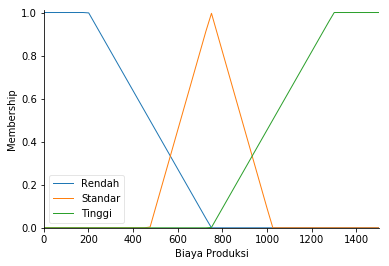

In [5]:
biayaproduksi.view()

# Fuzzifikasi pada Permintaan

Permintaan memiliki fungsi keanggotaan dengan 3 kondisi :
$$ Permintaan $$
$$ Turun = 10000 - 50000 \ bungkus $$
$$ Biasa = 30000 - 70000 \ bungkus $$
$$ Naik = 50000 - 90000 \ bungkus $$

Dengan fungsi keanggotaan Biaya Produksi berikut ini :

\begin{equation}
  prmt['turun'] = \mu PRMTTurun(y)=\begin{cases}
    1; & \text{$y\leq 10000$}.\\
    \frac {50000 - y}{50000 - 10000}; & \text{$10000 \leq y \leq 50000$}.\\
    0; & \text{$y\geq 50000$}.
  \end{cases}
  \\
  prmt['biasa'] = \mu PRMTBiasa(y)=\begin{cases}
    0; & \text{$y\leq 30000$ atau $y\geq 70000$}.\\
    \frac {y - 30000}{50000 - 30000}; & \text{$30000 \leq y \leq 50000$}.\\
    \frac {70000 - y}{70000 - 50000}; & \text{$50000 \leq y \leq 70000$}.\\
  \end{cases}
  \\
  prmt['naik'] = \mu PRMTNaik(y)=\begin{cases}
    0; & \text{$y\leq 50000$}.\\
    \frac {y - 50000}{90000 - 50000}; & \text{$50000 \leq y \leq 90000$}.\\
    1; & \text{$y \geq 90000$}.\\
  \end{cases}
\end{equation}

In [6]:
plt_prmt = np.arange(1,110001,10000)
permintaan = ctrl.Antecedent(np.arange(1,110001,10000), 'Permintaan')

In [7]:
permintaan['Turun'] = fuzz.trapmf(permintaan.universe, [1, 1, 10000, 50000])
permintaan['Biasa'] = fuzz.trimf(permintaan.universe, [30000, 50000, 70000])
permintaan['Naik'] = fuzz.trapmf(permintaan.universe, [50000, 90000, 110000, 110000])

- Plotting fungsi keanggotaan $\mu PRMTTurun(y)$, $\mu PRMTBiasa(y)$, dan $\mu PRMTNaik(y)$

Text(0.5,1,'Permintaan Naik')

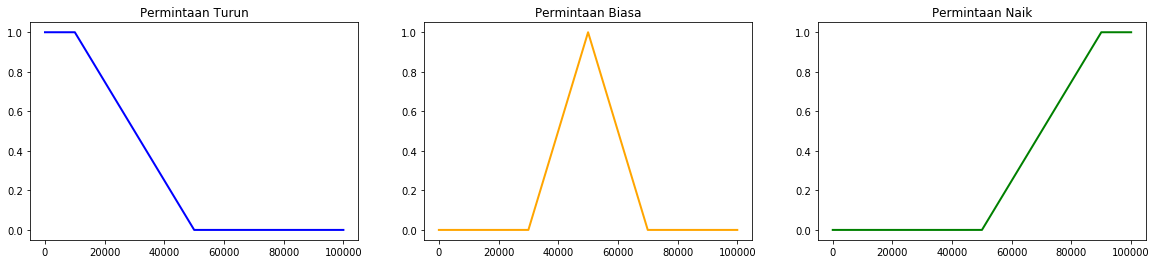

In [8]:
prmt_turun = fuzz.trapmf(plt_prmt, [1, 1, 10000, 50000])
prmt_biasa = fuzz.trimf(plt_prmt, [30000, 50000, 70000])
prmt_naik = fuzz.trapmf(plt_prmt, [50000, 90000, 110000, 110000])
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(20,4))
ax0.plot(plt_prmt,prmt_turun,'blue', linewidth=2, label='Permintaan Turun')
ax1.plot(plt_prmt,prmt_biasa,'orange', linewidth=2, label='Permintaan Biasa')
ax2.plot(plt_prmt,prmt_naik,'green', linewidth=2, label='Permintaan Naik')
ax0.set_title('Permintaan Turun')
ax1.set_title('Permintaan Biasa')
ax2.set_title('Permintaan Naik')

- Plotting ketiga fungsi keanggotaan Permintaan

C:\Users\8Ball270\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


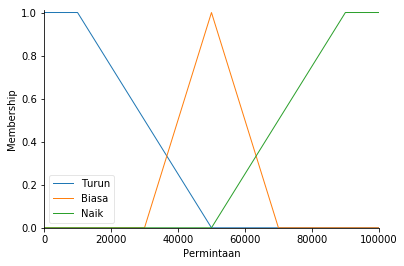

In [9]:
permintaan.view()

# Fuzzifikasi pada Jumlah Produksi

Jumlah Produksi memiliki fungsi keanggotaan dengan 3 kondisi :
$$ Produksi $$
$$ Berkurang = 10000 - 70000 \ bungkus $$
$$ Normal = 40000 - 100000 \ bungkus $$
$$ Bertambah = 70000 - 130000 \ bungkus $$

Dengan fungsi keanggotaan Jumlah Produksi berikut ini :

\begin{equation}
  prd['berkurang'] = \mu PRDBerkurang(z)=\begin{cases}
    1; & \text{$z\leq 10000$}.\\
    \frac {70000 - z}{70000 - 10000}; & \text{$10000 \leq z \leq 70000$}.\\
    0; & \text{$z\geq 70000$}.
  \end{cases}
  \\
  prd['normal'] = \mu PRDNormal(z)=\begin{cases}
    0; & \text{$z\leq 40000$ atau $z\geq 100000$}.\\
    \frac {z - 40000}{70000 - 40000}; & \text{$40000 \leq z \leq 70000$}.\\
    \frac {100000 - z}{100000 - 70000}; & \text{$70000 \leq z \leq 100000$}.\\
  \end{cases}
  \\
  prd['bertambah'] = \mu PRDBertambah(z)=\begin{cases}
    0; & \text{$z\leq 70000$}.\\
    \frac {z - 70000}{130000 - 70000}; & \text{$70000 \leq z \leq 130000$}.\\
    1; & \text{$z \geq 130000$}.\\
  \end{cases}
\end{equation}

In [10]:
plt_prd = np.arange(1,150001,10000)
produksi = ctrl.Consequent(np.arange(1,150001,10000),'Produksi')

In [11]:
produksi['Berkurang'] = fuzz.trapmf(produksi.universe, [1, 1, 10000, 70000])
produksi['Normal'] = fuzz.trimf(produksi.universe, [40000, 70000, 100000])
produksi['Bertambah'] = fuzz.trapmf(produksi.universe, [70000, 130000, 150000, 150000])

- Plotting fungsi keanggotaan $\mu PRDBerkurang(z)$, $\mu PRDNormal(z)$, dan $\mu PRDBertambah(z)$

Text(0.5,1,'Produksi Bertambah')

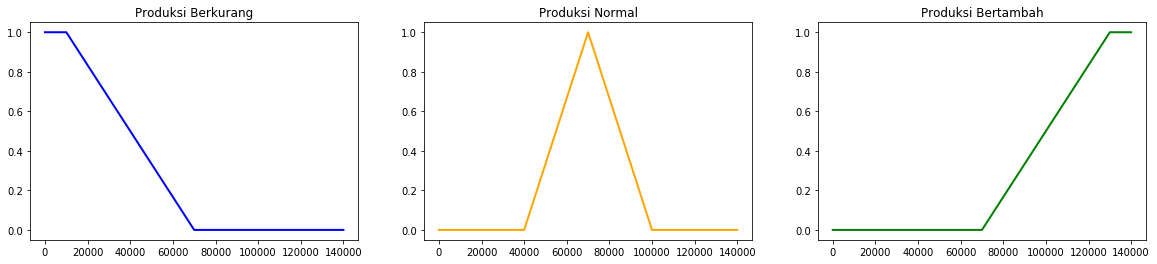

In [12]:
prd_berkurang = fuzz.trapmf(plt_prd, [1, 1, 10000, 70000])
prd_normal = fuzz.trimf(plt_prd, [40000, 70000, 100000])
prd_bertambah = fuzz.trapmf(plt_prd, [70000, 130000, 150000, 150000])
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3,figsize=(20,4))
ax0.plot(plt_prd,prd_berkurang,'blue', linewidth=2, label='Produksi Berkurang')
ax1.plot(plt_prd,prd_normal,'orange', linewidth=2, label='Produksi Normal')
ax2.plot(plt_prd,prd_bertambah,'green', linewidth=2, label='Produksi Bertambah')
ax0.set_title('Produksi Berkurang')
ax1.set_title('Produksi Normal')
ax2.set_title('Produksi Bertambah')

- Plotting ketiga fungsi keanggotaan Jumlah Produksi

C:\Users\8Ball270\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


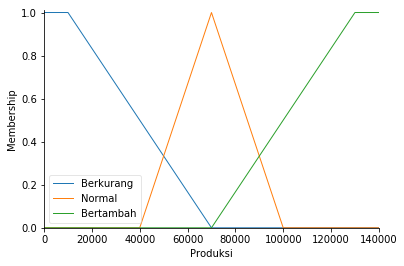

In [13]:
produksi.view()

# Mekanisme Inferensi

Dalam tahap inferensi ini tentu mendefinisikan hubungan fuzzy antara variabel input dan output, dengan kata lain aturan-aturan ini dibentuk untuk menyatakan relasi antara input yang ada dengan output. Operator yang yang digunakan untuk menghubungkan antara dua input adalah operator AND, dan yang menetapkan antara input-output adalah IF-THEN. Dari 2 input dan 1 output fuzzy tersebut akan ditetapkan aturan-aturan berdasarkan nilai dari masing-masing input dan output. Dimana aturan-aturan tersebut merupakan penetapan dan akan menentukan jumlah produksi dari coklat jenis H. Dari 2 input dimana masing-masing 2 input memiliki 3 kondisi, maka rule yang dapat dibuat berjumlah 3 x 3 = 9 rules.

1. IF Biaya Produksi RENDAH dan Permintaan TURUN THEN Jumlah Produksi NORMAL
2. IF Biaya Produksi STANDAR dan Permintaan TURUN THEN Jumlah Produksi NORMAL
3. IF Biaya Produksi TINGGI dan Permintaan TURUN THEN Jumlah Produksi BERKURANG

4. IF Biaya Produksi RENDAH dan Permintaan BIASA THEN Jumlah Produksi BERTAMBAH
5. IF Biaya Produksi STANDAR dan Permintaan BIASA THEN Jumlah Produksi NORMAL
6. IF Biaya Produksi TINGGI dan Permintaan BIASA THEN Jumlah Produksi BERKURANG

7. IF Biaya Produksi RENDAH dan Permintaan NAIK THEN Jumlah Produksi BERTAMBAH
8. IF Biaya Produksi STANDAR dan Permintaan NAIK THEN Jumlah Produksi NORMAL
9. IF Biaya Produksi TINGGI dan Permintaan NAIK THEN Jumlah Produksi NORMAL

In [14]:
rule1 = ctrl.Rule(biayaproduksi['Rendah'] & permintaan['Turun'], produksi['Normal'])
rule2 = ctrl.Rule(biayaproduksi['Standar'] & permintaan['Turun'], produksi['Normal'])
rule3 = ctrl.Rule(biayaproduksi['Tinggi'] & permintaan['Turun'], produksi['Berkurang'])
rule4 = ctrl.Rule(biayaproduksi['Rendah'] & permintaan['Biasa'], produksi['Bertambah'])
rule5 = ctrl.Rule(biayaproduksi['Standar'] & permintaan['Biasa'], produksi['Normal'])
rule6 = ctrl.Rule(biayaproduksi['Tinggi'] & permintaan['Biasa'], produksi['Berkurang'])
rule7 = ctrl.Rule(biayaproduksi['Rendah'] & permintaan['Naik'], produksi['Bertambah'])
rule8 = ctrl.Rule(biayaproduksi['Standar'] & permintaan['Naik'], produksi['Normal'])
rule9 = ctrl.Rule(biayaproduksi['Tinggi'] & permintaan['Naik'], produksi['Normal'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2af90f0b7b8>)

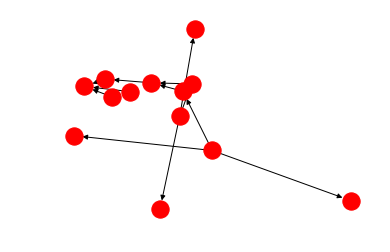

In [15]:
rule1.view()

# Rule Evaluation

Dengan fungsi ControlSystem ini dapat mengevaluasi rules yang ada dari rule1 - rule9

In [16]:
ctrl_produksi = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7, rule8,
                                    rule9,])

# Defuzzifikasi

Rules yang sudah dievaluasi, kemudian menggunakan fungsi ControlSystemSimulation untuk menyiapkan perhitungan defuzzifikasi sebelum dimasukkan 2 input data dari Biaya Produksi dan Permintaan.

In [17]:
dfzz_produksi = ctrl.ControlSystemSimulation(ctrl_produksi)

Metode Mamdani digunakan untuk menentukan jumlah produksi coklat jenis H, dengan data biaya produksi dan permintaan produk masing-masing adalah Rp 800,00 per bungkus dan 45.000 kemasan. Maka input untuk Biaya Produksi adalah 800, sedangkan input Permintaan adalah 45000

In [18]:
dfzz_produksi.input['Biaya Produksi'] = 800
dfzz_produksi.input['Permintaan'] = 45000

- Melakukan perhitungan defuzzy

In [19]:
dfzz_produksi.compute()

- Mencetak hasil defuzzy (Python)

In [20]:
print(dfzz_produksi.output['Produksi'])

63980.27601790471


- Plotting fungsi keanggotan Biaya Produksi setelah dimasukkan input nilai pada Biaya Produksi

C:\Users\8Ball270\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


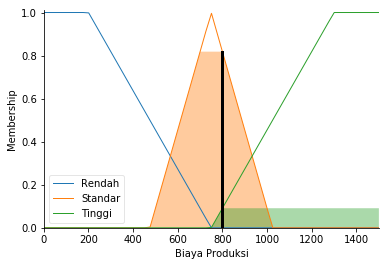

In [21]:
biayaproduksi.view(sim=dfzz_produksi)

- Plotting fungsi keanggotan Permintaan setelah dimasukkan input nilai pada Permintaan

C:\Users\8Ball270\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


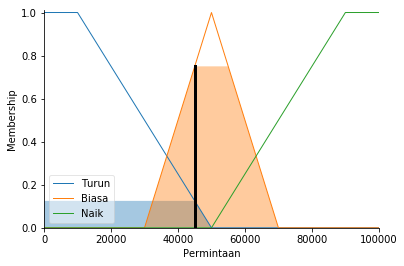

In [22]:
permintaan.view(sim=dfzz_produksi)

- Plotting fungsi keangggotaan Jumlah Produksi setelah dilakukan perhitungan defuzzifikasi output nilai pada Jumlah Produksi

C:\Users\8Ball270\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


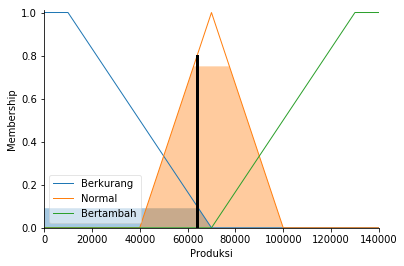

In [23]:
produksi.view(sim=dfzz_produksi)

# Perhitungan Secara Manual

Diketahui :
- Biaya Produksi : 800
- Permintaan     : 45000

Ditanya :
- Jumlah Produksi ?

**Jawab :**

**Biaya Produksi : 800**

\begin{equation}
  bprd['rendah'] = \mu BPRDRendah(x)=\begin{cases}
    1; & \text{$x\leq 200$}.\\
    \frac {750 - x}{750 - 200}; & \text{$200 \leq x \leq 750$}.\\
    0; & \text{$x\geq 750$}.\checkmark
  \end{cases}
  \\
  bprd['standar'] = \mu BPRDStandar(x)=\begin{cases}
    0; & \text{$x\leq 475$ atau $x\geq 1025$}.\\
    \frac {x - 475}{750 - 475}; & \text{$475 \leq x \leq 750$}.\\
    \frac {1025 - x}{1025 - 750}; & \text{$750 \leq x \leq 1025$}.\checkmark \\
  \end{cases}
  \\
  bprd['tinggi'] = \mu BPRDTinggi(x)=\begin{cases}
    0; & \text{$x\leq 750$}.\\
    \frac {x - 750}{1300 - 750}; & \text{$750 \leq x \leq 1300$}.\checkmark \\
    1; & \text{$x \geq 1300$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu BPRDStandar(800) = \frac {1025 - 800}{1025 - 750} \\
    \mu BPRDStandar(800) = \frac {225}{275} \\ 
    \mu BPRDStandar(800) = 0.82 \\
    \mu BPRDTinggi(800) = \frac {800 - 750}{1300-750} \\
    \mu BPRDTinggi(800) = \frac {50}{550} \\
    \mu BPRDTinggi(800) = 0.09 \\
\end{equation}

**Permintaan : 45000**

\begin{equation}
  prmt['turun'] = \mu PRMTTurun(y)=\begin{cases}
    1; & \text{$y\leq 10000$}.\\
    \frac {50000 - y}{50000 - 10000}; & \text{$10000 \leq y \leq 50000$}.\checkmark \\
    0; & \text{$y\geq 50000$}.
  \end{cases}
  \\
  prmt['biasa'] = \mu PRMTBiasa(y)=\begin{cases}
    0; & \text{$y\leq 30000$ atau $y\geq 70000$}.\\
    \frac {y - 30000}{50000 - 30000}; & \text{$30000 \leq y \leq 50000$}.\checkmark \\
    \frac {70000 - y}{70000 - 50000}; & \text{$50000 \leq y \leq 70000$}.\\
  \end{cases}
  \\
  prmt['naik'] = \mu PRMTNaik(y)=\begin{cases}
    0; & \text{$y\leq 50000$}.\checkmark \\
    \frac {y - 50000}{90000 - 50000}; & \text{$50000 \leq y \leq 90000$}.\\
    1; & \text{$y \geq 90000$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu PRMTTurun(45000) = \frac {50000 - 45000}{50000 - 10000} \\
    \mu PRMTTurun(45000) = \frac {5000}{40000} \\ 
    \mu PRMTTurun(45000) = 0.125 \\
    \mu PRMTBiasa(45000) = \frac {45000 - 30000}{50000 - 30000} \\
    \mu PRMTBiasa(45000) = \frac {15000}{20000} \\
    \mu PRMTBiasa(45000) = 0.75 \\
\end{equation}

#### Carilah nilai Z dari setiap 9 aturan (rules).

1. IF Biaya Produksi RENDAH dan Permintaan TURUN THEN Jumlah Produksi NORMAL

$$ \\ \alpha(predikat_1) = \mu BPRDRendah \cap \mu PRMTTurun $$
$$\alpha(predikat_1)   = min (\mu BPRDRendah[800], \mu PRMTTurun[45000]) $$
$$ \alpha(predikat_1) = min (0; 0,125) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Produksi Normal :
$$
  prd['normal'] = \mu PRDNormal(z)=\begin{cases}
    0; & \text{$z\leq 40000$ atau $z\geq 100000$}.\\
    \frac {z - 40000}{70000 - 40000}; & \text{$40000 \leq z \leq 70000$}.\\
    \frac {100000 - z}{100000 - 70000}; & \text{$70000 \leq z \leq 100000$}.\\
  \end{cases}
$$
Maka nilai $ Z_1 = 0 $


2. IF Biaya Produksi STANDAR dan Permintaan TURUN THEN Jumlah Produksi NORMAL

$$ \\ \alpha(predikat_2) = \mu BPRDStandar \cap \mu PRMTTurun $$
$$\alpha(predikat_2)   = min (\mu BPRDStandar[800], \mu PRMTTurun[45000]) $$
$$ \alpha(predikat_2) = min (0,82; 0,125) $$
$$ \alpha(predikat_2) = 0,125 $$

Lalu lihat himpunan Produksi Normal :
$$
  prd['normal'] = \mu PRDNormal(z)=\begin{cases}
    0; & \text{$z\leq 40000$ atau $z\geq 100000$}.\\
    \frac {z - 40000}{70000 - 40000}; & \text{$40000 \leq z \leq 70000$}.\\
    \frac {100000 - z}{100000 - 70000}; & \text{$70000 \leq z \leq 100000$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotaan, maka kita menguji satu persatu dari 2 nilai keanggotaan :
 $$ \frac {z - 40000}{30000} = 0.125 $$
 $$ z - 40000 = 3750 $$
 $$ z = 43750 $$
 
 $$ \frac {100000 - z}{30000} = 0.125 $$
 $$ 100000 - z = 3750 $$
 $$ - z = -96250 $$
 $$ z = 96250 $$
Akan diambil nilai terkecil, maka nilai $ Z_2 = 43750 $


3. IF Biaya Produksi TINGGI dan Permintaan TURUN THEN Jumlah Produksi BERKURANG

$$ \\ \alpha(predikat_3) = \mu BPRDTinggi \cap \mu PRMTTurun $$
$$\alpha(predikat_3)   = min (\mu BPRDTinggi[800], \mu PRMTTurun[45000]) $$
$$ \alpha(predikat_3) = min (0,09; 0,125) $$
$$ \alpha(predikat_3) = 0,09 $$

Lalu lihat himpunan Produksi Berkurang :
$$
  prd['berkurang'] = \mu PRDBerkurang(z)=\begin{cases}
    1; & \text{$z\leq 10000$}.\\
    \frac {70000 - z}{70000 - 10000}; & \text{$10000 \leq z \leq 70000$}.\\
    0; & \text{$z\geq 70000$}.
  \end{cases}
$$

Terdapat hanya 1 nilai keanggotaan, maka kita akan memasukkan nilainya :
$$
\frac {70000 - z}{60000} = 0.09 \\
70000 - z = 5400 \\ 
- z = - 64600 \\
z = 64600 \\
$$
Maka nilai $ Z_3 = 64600 $


4. IF Biaya Produksi RENDAH dan Permintaan BIASA THEN Jumlah Produksi BERTAMBAH

$$ \\ \alpha(predikat_4) = \mu BPRDRendah \cap \mu PRMTBiasa $$
$$\alpha(predikat_4)   = min (\mu BPRDRendah[800], \mu PRMTBiasa[45000]) $$
$$ \alpha(predikat_4) = min (0; 0,75) $$
$$ \alpha(predikat_4) = 0 $$

Lalu lihat himpunan Produksi Bertambah : 
$$
  prd['bertambah'] = \mu PRDBertambah(z)=\begin{cases}
    0; & \text{$z\leq 70000$}.\\
    \frac {z - 70000}{130000 - 70000}; & \text{$70000 \leq z \leq 130000$}.\\
    1; & \text{$z \geq 130000$}.\\
  \end{cases}
$$
Maka nilai $ Z_4 = 0 $


5. IF Biaya Produksi STANDAR dan Permintaan BIASA THEN Jumlah Produksi NORMAL

$$ \\ \alpha(predikat_5) = \mu BPRDStandar \cap \mu PRMTBiasa $$
$$\alpha(predikat_5)   = min (\mu BPRDStandar[800], \mu PRMTBiasa[45000]) $$
$$ \alpha(predikat_5) = min (0,82; 0,75) $$
$$ \alpha(predikat_5) = 0,75 $$

Lalu lihat himpunan Produksi Normal :
$$
  prd['normal'] = \mu PRDNormal(z)=\begin{cases}
    0; & \text{$z\leq 40000$ atau $z\geq 100000$}.\\
    \frac {z - 40000}{70000 - 40000}; & \text{$40000 \leq z \leq 70000$}.\\
    \frac {100000 - z}{100000 - 70000}; & \text{$70000 \leq z \leq 100000$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotaan, maka kita menguji satu persatu dari 2 nilai keanggotaan :
 $$ \frac {z - 40000}{30000} = 0.75 $$
 $$ z - 40000 = 22500 $$
 $$ z = 62500 $$
 
 $$ \frac {100000 - z}{30000} = 0.75 $$
 $$ 100000 - z = 22500 $$
 $$ - z = -77500 $$
 $$ z = 77500 $$
Akan diambil nilai terkecil, maka nilai $ Z_5 = 62500 $


6. IF Biaya Produksi TINGGI dan Permintaan BIASA THEN Jumlah Produksi BERKURANG

$$ \\ \alpha(predikat_6) = \mu BPRDTinggi \cap \mu PRMTBiasa $$
$$\alpha(predikat_6)   = min (\mu BPRDTinggi[800], \mu PRMTBiasa[45000]) $$
$$ \alpha(predikat_6) = min (0,09; 0,75) $$
$$ \alpha(predikat_6) = 0,09 $$

Lalu lihat himpunan Produksi Berkurang :
$$
  prd['berkurang'] = \mu PRDBerkurang(z)=\begin{cases}
    1; & \text{$z\leq 10000$}.\\
    \frac {70000 - z}{70000 - 10000}; & \text{$10000 \leq z \leq 70000$}.\\
    0; & \text{$z\geq 70000$}.
  \end{cases}
$$

Terdapat hanya 1 nilai keanggotaan, maka kita akan memasukkan nilainya :
$$
\frac {70000 - z}{60000} = 0.09 \\
70000 - z = 5400 \\ 
- z = - 64600 \\
z = 64600 \\
$$
Maka nilai $ Z_6 = 64600 $


7. IF Biaya Produksi RENDAH dan Permintaan NAIK THEN Jumlah Produksi BERTAMBAH

$$ \\ \alpha(predikat_7) = \mu BPRDRendah \cap \mu PRMTNaik $$
$$\alpha(predikat_7)   = min (\mu BPRDRendah[800], \mu PRMTNaik[45000]) $$
$$ \alpha(predikat_7) = min (0; 0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Produksi Bertambah :
$$
  prd['bertambah'] = \mu PRDBertambah(z)=\begin{cases}
    0; & \text{$z\leq 70000$}.\\
    \frac {z - 70000}{130000 - 70000}; & \text{$70000 \leq z \leq 130000$}.\\
    1; & \text{$z \geq 130000$}.\\
  \end{cases}
$$
Maka nilai $ Z_7 = 0 $


8. IF Biaya Produksi STANDAR dan Permintaan NAIK THEN Jumlah Produksi NORMAL

$$ \\ \alpha(predikat_8) = \mu BPRDStandar \cap \mu PRMTNaik $$
$$\alpha(predikat_8)   = min (\mu BPRDStandar[800], \mu PRMTNaik[45000]) $$
$$ \alpha(predikat_8) = min (0,82; 0) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Produksi Normal :
$$
  prd['normal'] = \mu PRDNormal(z)=\begin{cases}
    0; & \text{$z\leq 40000$ atau $z\geq 100000$}.\\
    \frac {z - 40000}{70000 - 40000}; & \text{$40000 \leq z \leq 70000$}.\\
    \frac {100000 - z}{100000 - 70000}; & \text{$70000 \leq z \leq 100000$}.\\
  \end{cases}
$$
Maka nilai $ Z_8 = 0 $


9. IF Biaya Produksi TINGGI dan Permintaan NAIK THEN Jumlah Produksi NORMAL

$$ \\ \alpha(predikat_9) = \mu BPRDTinggi \cap \mu PRMTNaik $$
$$\alpha(predikat_9)   = min (\mu BPRDTinggi[800], \mu PRMTNaik[45000]) $$
$$ \alpha(predikat_9) = min (0,09; 0) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Produksi Normal :
$$
  prd['normal'] = \mu PRDNormal(z)=\begin{cases}
    0; & \text{$z\leq 40000$ atau $z\geq 100000$}.\\
    \frac {z - 40000}{70000 - 40000}; & \text{$40000 \leq z \leq 70000$}.\\
    \frac {100000 - z}{100000 - 70000}; & \text{$70000 \leq z \leq 100000$}.\\
  \end{cases}
$$
Maka nilai $ Z_9 = 0 $


Setelah nilai Z dari setiap 9 rules didapatkan $(Z_1 - Z_9)$, maka kita dapat mencari nilai Z, yaitu :

$ Z = $ $$ \frac
{(\alpha (predikat_1) \times Z_1) +
(\alpha (predikat_2) \times Z_2) +
(\alpha (predikat_3) \times Z_3) +
(\alpha (predikat_4) \times Z_4) +
(\alpha (predikat_5) \times Z_5) +
(\alpha (predikat_6) \times Z_6) +
(\alpha (predikat_7) \times Z_7) +
(\alpha (predikat_8) \times Z_8) +
(\alpha (predikat_9) \times Z_9)}
{\alpha (predikat_1) + \alpha (predikat_2) +
\alpha (predikat_3) + \alpha (predikat_4) +
\alpha (predikat_5) + \alpha (predikat_6) +
\alpha (predikat_7) + \alpha (predikat_8) +
\alpha (predikat_9)} $$

$$Z = \frac{0 + (0.125 \times 43750) + (0.09 \times 64600) + 0 + (0.75 \times 62500) + (0.09 \times 64600) + 0 + 0 + 0}{0 + 0.125 + 0.09 + 0 + 0.75 + 0.09 + 0 + 0 + 0} $$
 
$$ Z = \frac{5468.75 + 5814 + 46875 + 5814}{1.055} $$
$$ Z = \frac{63971.75}{1.055} $$
$$ Z = 60636.7299 $$

Jadi produksi coklat jenis H, dengan data biaya produksi dan permintaan produk masing-masing adalah Rp 800,00 per bungkus dan 45000 kemasan adalah sebanyak 60636,73

**Analisa :**
Hasil perhitungan defuzzifikasi menggunakan python bernilai 63980.28, sedangkan perhitungan defuzzifikasi menggunakan hitungan manual bernilai 60636.73, sehingga selisih antara perhitungan python dan manual adalah **3343.55**

# Referensi

Abrori, Muchammad dan Amrul Hinung Prihamayu. 2015. *Aplikasi Logika Fuzzy Metode Mamdani dalam Pengambilan Keputusan Penentuan Jumlah Produksi*. Yogyakarta : UIN Sunan Kalijaga

http://ejournal.uin-suka.ac.id/saintek/kaunia/article/view/580/580